<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #3

02/27/2022

In [48]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import training dataset
dataFrame = pd.read_csv("https://raw.githubusercontent.com/zachmakki15/IDS/main/HW3/Updated_Life_Expectancy.csv")
dataFrame.head(10)

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0
5,Afghanistan,2015,65.0,263,0.01,71.279624,19.1,8.16,584.259210,33736494,10.1
6,Albania,2010,76.2,91,5.28,41.822757,54.3,5.34,494.358832,291321,12.5
7,Albania,2011,76.6,88,5.37,437.062100,55.1,5.71,4437.178680,295195,13.3
8,Albania,2012,76.9,86,5.14,412.443356,55.8,5.59,4247.614380,2941,14.2
9,Albania,2013,77.2,84,4.76,430.876979,56.5,5.66,4414.723140,289592,14.2


#Data Visualization and Correlation

Examine the distribution of the numeric attributes that are not the target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43355173d0>,
      dtype=object)

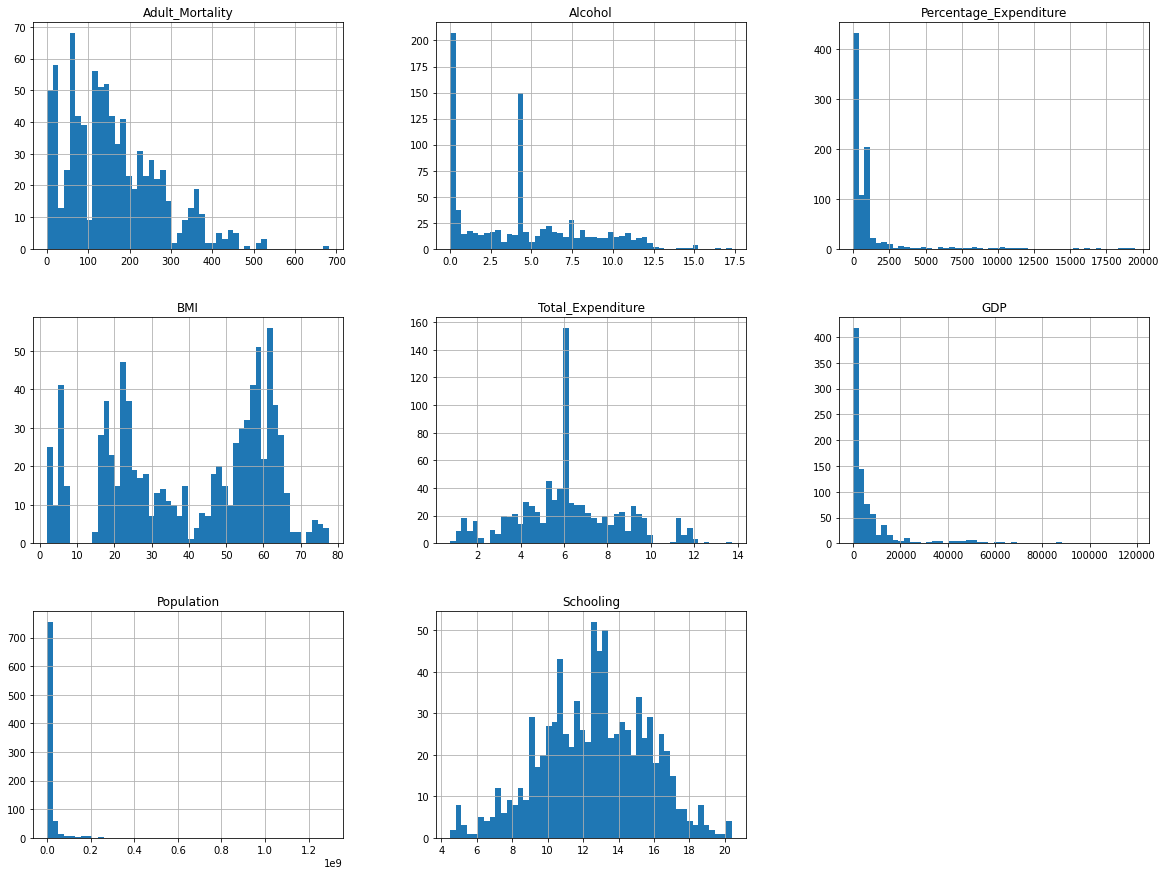

In [49]:
#Display histograms of numeric attributes excluding target
dataFrame.hist(bins=50, figsize=(20,15), column=['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling'])

Schooling is well distrbuted but the rest of the data is not, this data will be normalized

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f433e5481d0>,
      dtype=object)

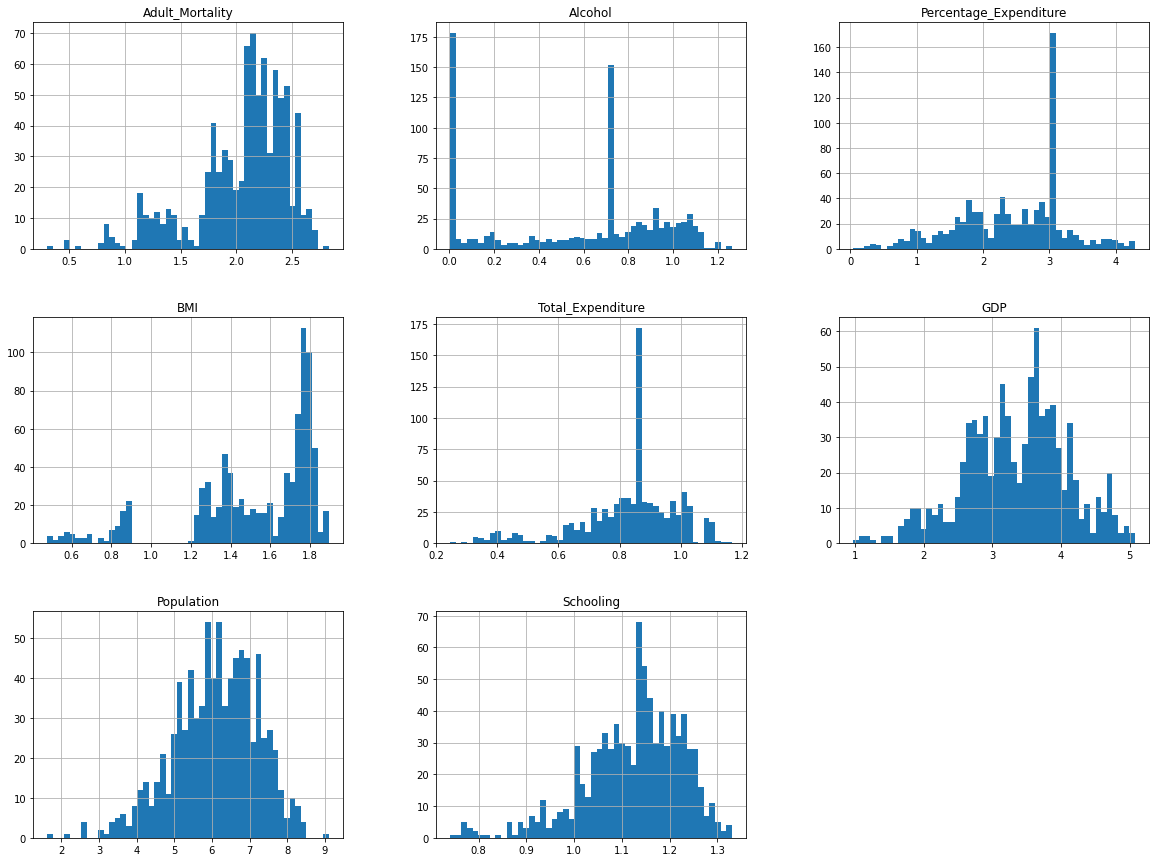

In [50]:
#Normalize using log + 1
x = dataFrame[['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling']]
x_norm = np.log10(x + 1)
x_norm.hist(bins=50, figsize=(20,15))

The numeric attributes in x are much better distrubuted now. Lets add y and x together and use pearsons r correlation to find how much each numeric attribute is correlated to the life expectancy target 

In [51]:
#Get correlation matrix from training data set
xy = pd.concat([x_norm, dataFrame['Life_Expectancy']], axis=1)
corr_matrix = xy.corr()
corr_matrix['Life_Expectancy'].sort_values(ascending=False)

Life_Expectancy           1.000000
Schooling                 0.779440
GDP                       0.544775
Percentage_Expenditure    0.504108
Alcohol                   0.421784
BMI                       0.379008
Total_Expenditure         0.194535
Population               -0.076248
Adult_Mortality          -0.517067
Name: Life_Expectancy, dtype: float64

In [52]:
#Plot the correlation heatmap
corr_matrix.style.background_gradient(cmap='coolwarm')

,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Life_Expectancy
Adult_Mortality,1.000000,-0.178853,-0.210187,-0.191447,-0.094843,-0.267848,0.099407,-0.411094,-0.517067
Alcohol,-0.178853,1.000000,0.490820,0.193119,0.219366,0.424189,0.020721,0.468455,0.421784
Percentage_Expenditure,-0.210187,0.490820,1.000000,0.275078,0.249142,0.820199,0.010611,0.494798,0.504108
BMI,-0.191447,0.193119,0.275078,1.000000,0.081810,0.304543,-0.027971,0.336454,0.379008
Total_Expenditure,-0.094843,0.219366,0.249142,0.081810,1.000000,0.151635,-0.000872,0.197273,0.194535
GDP,-0.267848,0.424189,0.820199,0.304543,0.151635,1.000000,-0.002854,0.561620,0.544775
Population,0.099407,0.020721,0.010611,-0.027971,-0.000872,-0.002854,1.000000,-0.073212,-0.076248
Schooling,-0.411094,0.468455,0.494798,0.336454,0.197273,0.561620,-0.073212,1.000000,0.779440
Life_Expectancy,-0.517067,0.421784,0.504108,0.379008,0.194535,0.544775,-0.076248,0.779440,1.000000


Some notes from the correlation results: Schooling seems to be highly correlated with life expectancy, GDP, Percentage Expenditure, Alcohol consumption, and BMI look to have a mild correlation with the target Life Expectancy. This heatmap also confirms are belief from viewing the data in SQL that population is not correlaed to life expectancy. Also surpirsingly adult morarlity rates do not seem to have any effect on life expectancy.

#Linear Models
Create linear model for the following attributes Schooling vs Life Expectancy, GDP vs Life Expectancy, Percetage Expenditure vs Life Expectancy, and Alcohol vs Life Expectancy

Before creating the models, scatter plots will be made for the attributes which had the highest correlation to the target attribute.

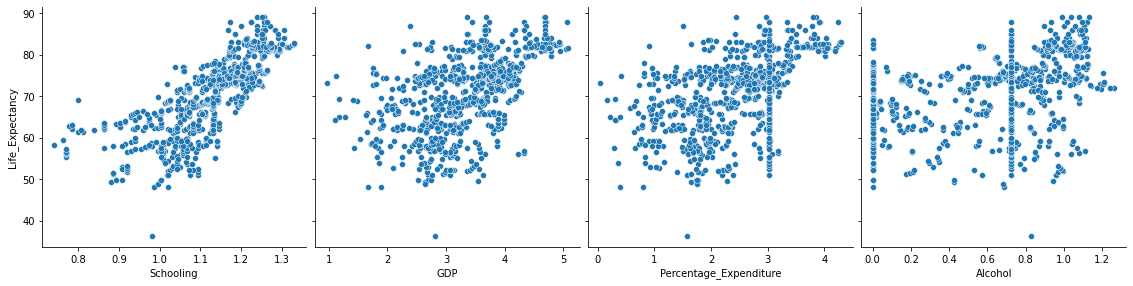

In [53]:
sns.pairplot(xy, x_vars=['Schooling', 'GDP', 'Percentage_Expenditure', 'Alcohol'], y_vars=['Life_Expectancy'], height=4, aspect=1, kind='scatter')
plt.show();

The odd data points stacked on top of each other in Percentage Expenditure, and Alcohol could be from the amount of missing values which needed to be filled in SQL

##Schooling and Life Expectancy

In [54]:
#import linear model to do linear regression on normalized area and temp
#Import train test split to split data using 80:20 train/test ration
#Import r2 score and mse to calculate linear model accuracy
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
lm = linear_model.LinearRegression()

#reshape columns to fit the lm fit method
x = xy['Schooling'].values.reshape(-1,1)
y = xy['Life_Expectancy'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(-4.44432683568688, 66.70085283623155)

Linear Model = Life Expectancy = -4.44 + 66.70 * Schooling

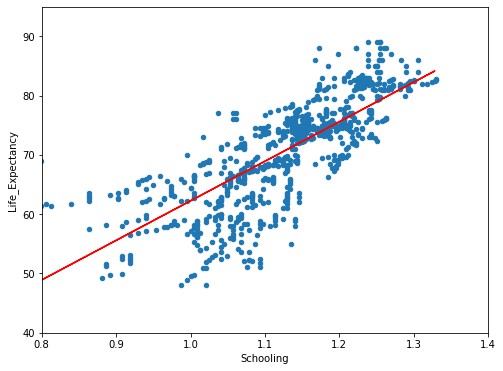

In [55]:
#Plot the linear regression just created
xy.plot(kind='scatter', x='Schooling', y='Life_Expectancy', figsize=(8, 6))
plt.axis([0.8, 1.40, 40, 95])
plt.plot(x_train, t0 + t1*x_train, "r")
plt.show()

In [56]:
#Get MSE and R^2
#Train the model using the test data
y_test_predictions = lm.predict(x_test)

#Print the scores
r2_sch = r2_score(y_test, y_test_predictions)
mse_sch = mean_squared_error(y_test, y_test_predictions)
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))

R2 score: 0.6635308455844382
Mean squared error: 27.700947290130056


##GDP and Life Expectancy

In [57]:
#reshape new x
x = xy['GDP'].values.reshape(-1,1)

#Re divide train test for new x
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

#Fit model
lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(49.4453624835665, 6.288342483140985)

Linear Model: Life Expectancy = 49.44 + 6.288 * GDP

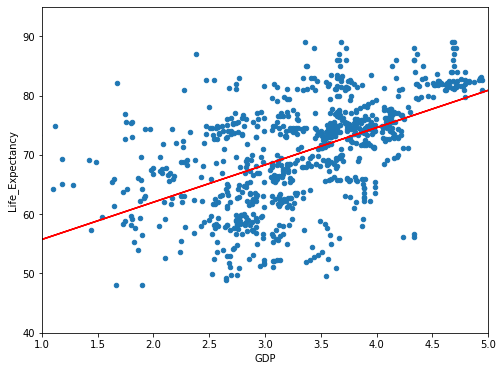

In [58]:
#Plot the linear regression just created
xy.plot(kind='scatter', x='GDP', y='Life_Expectancy', figsize=(8, 6))
plt.axis([1, 5, 40, 95])
plt.plot(x_train, t0 + t1*x_train, "r")
plt.show()

In [59]:
#Get MSE and R^2
#Train the model using the test data
y_test_predictions = lm.predict(x_test)

#Print the scores
r2_gdp = r2_score(y_test, y_test_predictions)
mse_gdp = mean_squared_error(y_test, y_test_predictions)
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))

R2 score: 0.35462215605198233
Mean squared error: 53.13288722847332


##Percentage_Expenditure and Life Expectancy

In [60]:
#reshape new x
x = xy['Percentage_Expenditure'].values.reshape(-1,1)

#Re divide train test for new x
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

#Fit model
lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(57.553816544258545, 5.309282897012041)

Linear Model: Life Expectancy = 57.55 + 5.31 * Percentage Expenditure

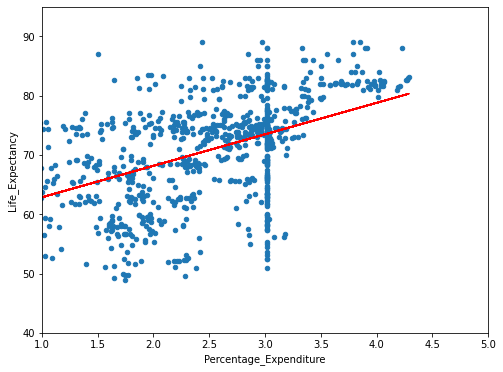

In [61]:
#Plot the linear regression just created
xy.plot(kind='scatter', x='Percentage_Expenditure', y='Life_Expectancy', figsize=(8, 6))
plt.axis([1, 5, 40, 95])
plt.plot(x_train, t0 + t1*x_train, "r")
plt.show()

In [62]:
#Get MSE and R^2
#Train the model using the test data
y_test_predictions = lm.predict(x_test)

#Print the scores
r2_pe = r2_score(y_test, y_test_predictions)
mse_pe = mean_squared_error(y_test, y_test_predictions)
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))

R2 score: 0.33404758187812655
Mean squared error: 54.82675778756458


##Alcohol and Life Expectancy

In [63]:
#reshape new x
x = xy['Alcohol'].values.reshape(-1,1)

#Re divide train test for new x
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

#Fit model
lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(65.31758753305125, 8.913750684728559)

Linear Model: Life Expectancy = 65.32 + 8.91 * Alcohol

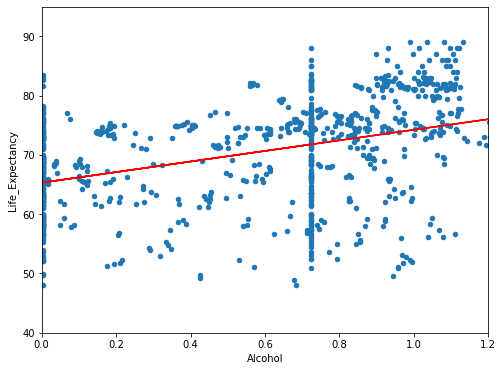

In [64]:
#Plot the linear regression just created
xy.plot(kind='scatter', x='Alcohol', y='Life_Expectancy', figsize=(8, 6))
plt.axis([0, 1.2, 40, 95])
plt.plot(x_train, t0 + t1*x_train, "r")
plt.show()

In [65]:
#Get MSE and R^2
#Train the model using the test data
y_test_predictions = lm.predict(x_test)

#Print the scores
r2_alc = r2_score(y_test, y_test_predictions)
mse_alc = mean_squared_error(y_test, y_test_predictions)
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))

R2 score: 0.26257254480176184
Mean squared error: 60.71117901497709


##Model Results
Visualization using bar graphs to compare the r2 scores and mse scores of the four linear regression models created above

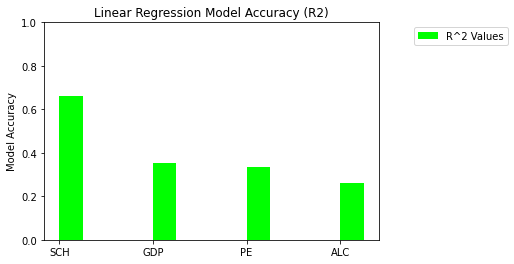

In [66]:
#Graph Data
labels = ['SCH', 'GDP', 'PE', 'ALC']
mse_values = [mse_sch, mse_gdp, mse_pe, mse_alc]
r2_values = [r2_sch, r2_gdp, r2_pe, r2_alc]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, r2_values, width, label='R^2 Values', color='lime')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Linear Regression Model Accuracy (R2)')
plt.show()

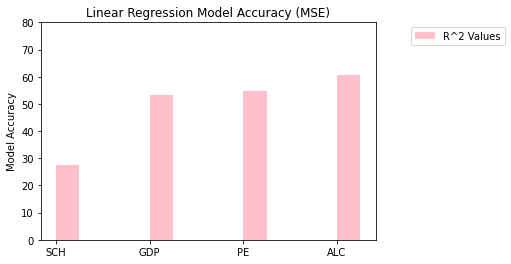

In [67]:
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, mse_values, width, label='R^2 Values', color='pink')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,80)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Linear Regression Model Accuracy (MSE)')
plt.show()

Based on the graphs displayed above the SCH (Schooling) model performed the best, and this makes sense as Schooling had the strongest correlation to the target attribute Life Expectancy. In fact the order of model accuracy lines up perfectly with the amount of correlation each attribute tested has with the target.

#Conclusions

1) How does Adult mortality rates affect life expectancy?

According to the correlation performed on this dataset adult mortality rate does not have a strong relationship with life expectancy. As previously noted I did find this surprising as one would assume mortality rate would have some effect on life expectancy.

2) Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?

Eating habits im assuming can be judged via the BMI attribute, and social factors and economic factors I will assume can be judge via the GDP, Schooling, and Percentage Expenditure attributes. 
If Schooling, Percentage Expenditures and GDP can be considered social and economic factors then social and economic factors have the most effect on life expectancy. Alcohol consumpton according to this dataset also has a mild correlation with life expectancy. Eating habits do seem to also have a mild correlation to life expectancy, but less then alcohol or the social and economic factors listed above.

3) What is the impact of schooling on the lifespan of humans?

According to this dataset schooling seems to have a larger impact on the lifespan of humans then any other social, economic, or dietary issue measured in this dataset. 